URL: https://github.com/ifood/ifood-data-advanced-analytics-test

In [1]:
# Exercício aula 08/05/2023 - Ifood Case
# Fazer um Modelo de regressão linear para preencher os valores faltantes de Income. O que fazer com as variáveis categóricas?

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Puxando csv para dataframe

df_ifood = pd.read_csv('retail_case_data.csv')

In [4]:
pd.options.display.max_columns = 500 # mudando a visualização para poder ver todas as colunas
df_ifood # printando o dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [50]:
# analisando totais (count), médias, desvios-padrão, mínimos, máximos e quartis de cada coluna

df_ifood.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [51]:
df_ifood.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [6]:
df_ifood.info() # vendo os tipos das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df_ifood.isnull().sum().sort_values(ascending=False) # dados faltantes

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [8]:
# criando novo dataset para manter o original sem alteração

df_ifood_new = df_ifood.copy()

In [9]:
(df_ifood_new['MntMeatProducts'] < df_ifood_new['MntFishProducts']).sum() # testando se peixe está separado de carne: está

158

In [10]:
df_ifood_new[['MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [11]:
# Analisando o pdf, resolvemos criar a coluna Mnt, que soma todas os gastos do cliente dos últimos 2 anos
# (com vinhos + frutas + carnes + peixes + doces + produtos em ouro)

df_ifood_new['Mnt'] = df_ifood_new[['MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds']].sum(axis=1)

<Axes: xlabel='Mnt', ylabel='Income'>

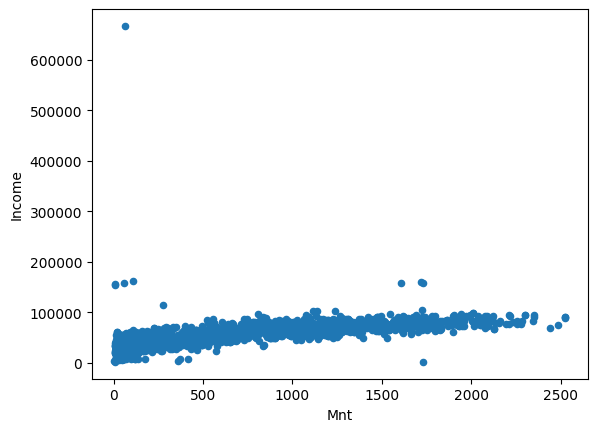

In [12]:
df_ifood_new.plot.scatter(x='Mnt',y='Income')


In [13]:
# primeiro tratamente de outlier mais gritante, acima de 600.000

outlier_index = df_ifood_new[df_ifood_new['Income'] > 600000].index
outlier_index

Int64Index([2233], dtype='int64')

In [14]:
# dropando outlier

df_ifood_new = df_ifood_new.drop(index=outlier_index).reset_index()

<Axes: xlabel='Mnt', ylabel='Income'>

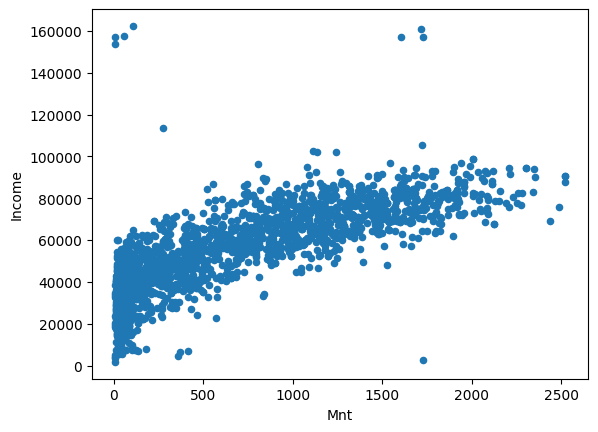

In [15]:
# novo gráfico sem o outlier

df_ifood_new.plot.scatter(x='Mnt',y='Income')

In [16]:
# Checando as correlações todas em relação ao Income para estabelecer a melhor coluna para fazer a regressão linear: Mnt é a melhor (79%)

df_ifood_new.corr(numeric_only=True)['Income'].sort_values(ascending=False)

Income                 1.000000
Mnt                    0.792650
NumCatalogPurchases    0.696541
MntMeatProducts        0.692465
MntWines               0.688269
NumStorePurchases      0.630397
MntSweetProducts       0.523746
MntFishProducts        0.520351
MntFruits              0.507959
NumWebPurchases        0.458812
AcceptedCmp5           0.396571
MntGoldProds           0.389204
AcceptedCmp1           0.327167
AcceptedCmp4           0.219337
Response               0.161049
AcceptedCmp2           0.103909
Teenhome               0.034363
Recency                0.006945
ID                     0.000064
index                 -0.004859
AcceptedCmp3          -0.015286
Complain              -0.030583
NumDealsPurchases     -0.108457
Year_Birth            -0.198064
Kidhome               -0.514935
NumWebVisitsMonth     -0.650564
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64

In [17]:
# Segundo tratamento de Outliers - acima de 120.000 - talvez seja melhor não tirar esses, muito forçado

outlier_index_2 = df_ifood_new[df_ifood_new['Income'] > 120_000].index
outlier_index_2

Int64Index([164, 617, 655, 687, 1300, 1653, 2132], dtype='int64')

In [18]:
# Dropando Outliers 

df_ifood_new = df_ifood_new.drop(outlier_index_2).reset_index()

<Axes: xlabel='Mnt', ylabel='Income'>

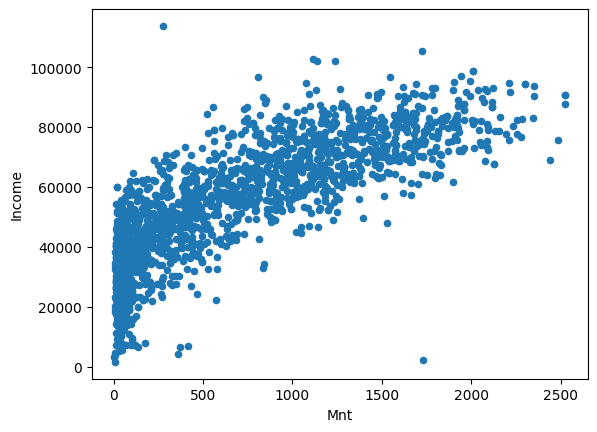

In [19]:
# Novo gráfico

df_ifood_new.plot.scatter(x='Mnt',y='Income')

In [20]:
# Checando novos índices de correlação sem Outliers: Todos melhoraram, e Mnt saltou para 82%. Usaremos MnT então e nada das variáveis categóricas.

df_ifood_new.corr(numeric_only=True)['Income'].sort_values(ascending=False)

Income                 1.000000
Mnt                    0.823628
MntWines               0.730488
NumCatalogPurchases    0.709985
MntMeatProducts        0.702684
NumStorePurchases      0.686020
MntSweetProducts       0.555706
MntFishProducts        0.552036
MntFruits              0.538503
NumWebPurchases        0.502635
MntGoldProds           0.418538
AcceptedCmp5           0.417409
AcceptedCmp1           0.344840
AcceptedCmp4           0.232934
Response               0.174524
AcceptedCmp2           0.110066
Teenhome               0.042254
Recency                0.005657
ID                     0.000762
index                 -0.002662
level_0               -0.002663
AcceptedCmp3          -0.011330
Complain              -0.030243
NumDealsPurchases     -0.132680
Year_Birth            -0.210634
Kidhome               -0.532105
NumWebVisitsMonth     -0.648646
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
# NaNs no Income

df_ifood_new[df_ifood_new['Income'].isnull()]

,level_0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Mnt
10,10,10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,19
27,27,27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,637
43,43,43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,186
48,48,48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,124
58,58,58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,46
71,71,71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,109
90,90,90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,603
91,91,91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,18
92,92,92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,985
128,128,128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,404


In [24]:
# Criando dataframe sem os NaNs no Income (negação da célula acima) para usar como X e Y na regressão linear abaixo, sem NaNs

df_clean = df_ifood_new[~df_ifood_new['Income'].isnull()]

In [25]:
x = df_clean['Mnt'].values.reshape(-1,1)
x

array([[1617],
       [  27],
       [ 776],
       ...,
       [1241],
       [ 843],
       [ 172]], dtype=int64)

In [26]:
y = df_clean['Income'].values.reshape(-1,1)
y

array([[58138.],
       [46344.],
       [71613.],
       ...,
       [56981.],
       [69245.],
       [52869.]])

In [27]:
# Fazendo a Regressão Linear

lr.fit(x,y)

LinearRegression()

In [28]:
# Adicionando o resultado da Regressão Linear no dataframe, coluna Lin_Reg

df_ifood_new['Lin_Reg'] = lr.predict(df_ifood_new['Mnt'].values.reshape(-1,1))
df_ifood_new['Lin_Reg']
y_pred = lr.predict(x)

In [29]:
# Print do dataframe com a nova coluna

df_ifood_new

,level_0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Mnt,Lin_Reg
0,0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,80255.327431
1,1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,35202.955902
2,2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,56425.739723
3,3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,35939.661349
4,4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,46395.211722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2234,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1341,72434.915770
2228,2235,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,444,47018.577869
2229,2236,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1241,69601.433283
2230,2237,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,843,58324.172989


C:\Users\Fabio\AppData\Local\Temp\ipykernel_8540\1136545296.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


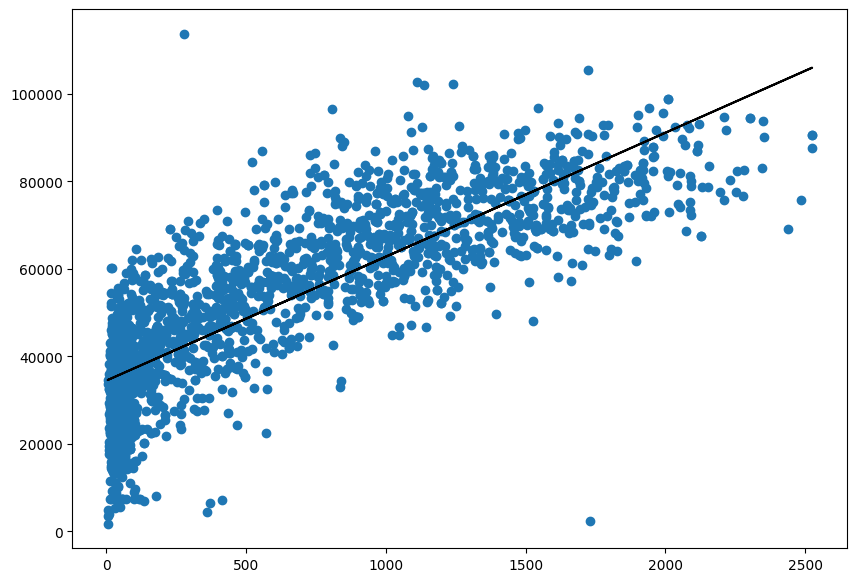

In [30]:
# Plotando

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
plt.scatter(x='Mnt',y='Income',data=df_ifood_new)
plt.plot('Mnt','Lin_Reg',data=df_ifood_new,color='black')
fig.show()

In [31]:
# Printando os NaN

df_ifood_new[df_ifood_new['Income'].isnull()]

,level_0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Mnt,Lin_Reg
10,10,10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,19,34976.277303
27,27,27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,637,52487.199067
43,43,43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,186,39708.193055
48,48,48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,124,37951.433914
58,58,58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,46,35741.317575
71,71,71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,109,37526.411541
90,90,90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,603,51523.815022
91,91,91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,18,34947.942478
92,92,92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,985,62347.718119
128,128,128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,404,45885.184875


In [32]:
# Substituindo os valores NaN pelos da regressão linear

df_ifood_new['Income'] = df_ifood_new['Income'].fillna('Lin_Reg')

In [33]:
# Verificando que não há mais NaN

df_ifood_new['Income'].isnull().sum()

0

In [34]:
# Printando o df

df_ifood_new

,level_0,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Mnt,Lin_Reg
0,0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,80255.327431
1,1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,35202.955902
2,2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,56425.739723
3,3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,35939.661349
4,4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,46395.211722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2234,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1341,72434.915770
2228,2235,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,444,47018.577869
2229,2236,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1241,69601.433283
2230,2237,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,843,58324.172989


In [35]:
lr.coef_[0][0] # A - coeficiente angular da reta y = a.x + b

28.33482486105604

In [36]:
lr.intercept_[0] # B - coeficiente linear da reta y = a.x + b

34437.91563090235

In [37]:
# Qual a média e desvio padrão? - para testar o resultado - (original, predito)
# url = https://scikit-learn.org/stable/modules/model_evaluation.html

import sklearn.metrics as metrics
from math import sqrt

mae  = metrics.mean_absolute_error(y,y_pred)
mse  = metrics.mean_squared_error(y,y_pred)
rmse = sqrt(mse)
r2   = metrics.r2_score(y,y_pred) * 100

print('Mean absolute error (módulo) =', mae)
print('Mean Squared Error =', mse)
print('Root Mean Squared Error ("equivalente" do desvio padrão, para a comparação entre 2 séries) =', rmse)
print('R-Squared or Coefficient of determination (não é sempre igual a Pearson - coef. de correlação - ao quadrado) =', r2)

Mean absolute error (módulo) = 9213.90176231976
Mean Squared Error = 137933692.88758317
Root Mean Squared Error ("equivalente" do desvio padrão, para a comparação entre 2 séries) = 11744.51756725593
R-Squared or Coefficient of determination (não é sempre igual a Pearson - coef. de correlação - ao quadrado) = 67.83635205442198


In [38]:
# treinando e testando:

from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [40]:
len(x_train)/len(x)

0.7998188405797102

In [41]:
lr_2 = LinearRegression()

In [42]:
lr_2.fit(x_train, y_train)

LinearRegression()

In [43]:
y_test_pred = lr_2.predict(x_test) # y_hat, yHat

In [44]:
y_train_pred = lr_2.predict(x_train)

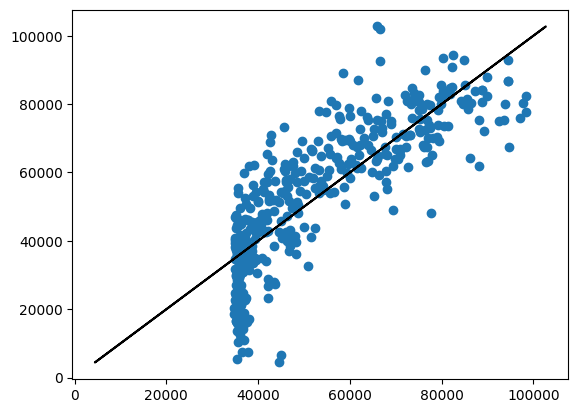

In [45]:
plt.scatter(x=y_test_pred, y=y_test)
plt.plot(y_test, y_test, color='black')

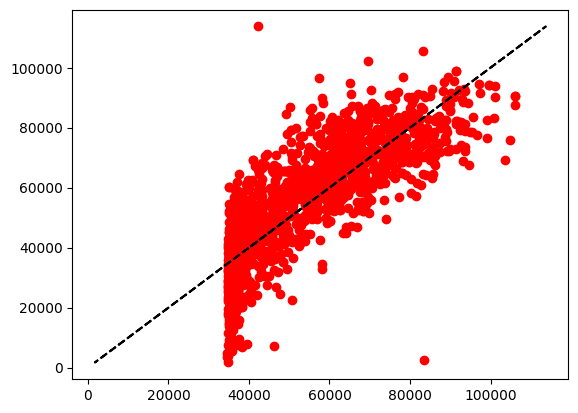

In [46]:
plt.scatter(x=y_train_pred, y=y_train, color='red')
plt.plot(y_train, y_train, color='black', linestyle='dashed')

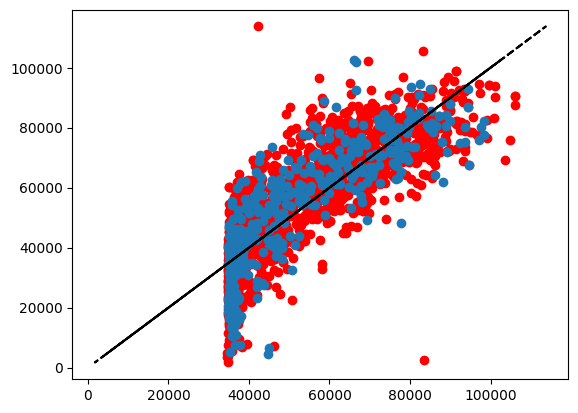

In [47]:
plt.scatter(x=y_train_pred, y=y_train, color='red')
plt.plot(y_train, y_train, color='black', linestyle='dashed')
plt.scatter(x=y_test_pred, y=y_test)
plt.plot(y_test, y_test, color='black')

In [48]:
#criando função

def my_metrics(y_true,y_pred):
    mae  = metrics.mean_absolute_error(y_true,y_pred)
    mse  = metrics.mean_squared_error(y_true,y_pred)
    rmse = sqrt(mse)
    r2   = metrics.r2_score(y_true,y_pred) * 100
    print('Mean absolute error (módulo) =', mae)
    print('Mean Squared Error =', mse)
    print('Root Mean Squared Error ("equivalente" do desvio padrão, para a comparação entre 2 séries) =', rmse)
    print('R-Squared or Coefficient of determination (não é sempre igual a Pearson - coef. de correlação - ao quadrado) =', r2)

In [49]:
my_metrics(y_test, y_test_pred) 

Mean absolute error (módulo) = 9316.642738167438
Mean Squared Error = 140940074.7679946
Root Mean Squared Error ("equivalente" do desvio padrão, para a comparação entre 2 séries) = 11871.81851141579
R-Squared or Coefficient of determination (não é sempre igual a Pearson - coef. de correlação - ao quadrado) = 68.2105264545092
